# <span style="font-size: 28px;"><b>Demo: Implementing Advanced Models in SQL Server</b></span>

## **Step 1: Import Necessary Libraries**

In [1]:
from sqlalchemy import create_engine

import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## **Step 2: Connect to SQL Server**

In [2]:
# Connection string components
server = 'DESKTOP'                  # Server name
database = 'Transactions'           # Database name
driver= 'SQL Server'                   

# SQLAlchemy connection string
connection_string = f'mssql+pyodbc://{server}/{database}?driver={driver}&trusted_connection=yes'

# Create the engine
engine = create_engine(connection_string)

## **Step 3: Fetch Time Series Data from SQL Server**

In [3]:
# SQL query
query = '''
SELECT transaction_id, customer_id, 
       CAST(date AS DATE) as date, 
       CAST(time AS TIME) as time, 
       product_name, category, quantity, price
FROM dbo.Transactions
'''

# Use the engine to connect and execute the query
df = pd.read_sql_query(query, engine)

In [4]:
# Display the DataFrame
df.head()

,transaction_id,customer_id,date,time,product_name,category,quantity,price
0,1,C1001,2023-01-01,09:12:34.0000000,Shirt,Apparel,2,29.990000
1,2,C1002,2023-01-01,10:25:17.0000000,Headphones,Electronics,1,59.990002
2,3,C1003,2023-01-02,13:45:52.0000000,Book,Books,3,12.990000
3,4,C1004,2023-01-03,16:38:21.0000000,Shoes,Apparel,1,49.990002
4,5,C1005,2023-01-03,17:55:43.0000000,TV,Electronics,1,399.989990


## **Step 4: Prepare the Data**

In [5]:
# Convert date to datetime format and aggregate sales data by date
df['date'] = pd.to_datetime(df['date'])
df_daily_sales = df.groupby('date')['price'].sum().reset_index()

# Use date as the DataFrame index
df_daily_sales.set_index('date', inplace=True)

## **Step 5: Fit SARIMA Model**

In [6]:
# Define SARIMA model's order and seasonal order
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)

# Define the model
model = SARIMAX(df_daily_sales['price'], order=my_order, seasonal_order=my_seasonal_order)

# Fit the model
model_fit = model.fit(disp=False)

## **Step 6: Make Predictions**

In [8]:
future_steps = 30
forecast = model_fit.forecast(steps=future_steps)

## **Step 7: Visualizing the Forecast**

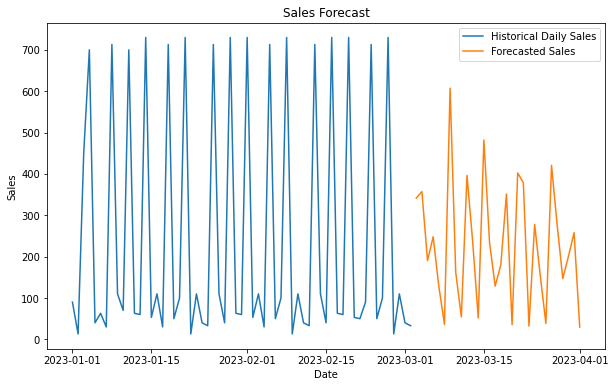

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales.index, df_daily_sales['price'], label='Historical Daily Sales')
plt.plot(pd.date_range(df_daily_sales.index[-1] + pd.Timedelta(days=1), periods=future_steps), forecast, label='Forecasted Sales')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()